<a href="https://colab.research.google.com/github/oganiler/google_colab/blob/main/CNN_on_CIFAR_10_Dataset_By_Functional_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
#Functional Keras API
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [2]:
#Load the data from cifar10
cifar10 = tf.keras.datasets.cifar10

#get the train and test numpy data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print("Type:", type(x_train))
print("Shape test_x:", x_test.shape)
print("Shape train_x:", x_train.shape)

#normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

print("Shape train_y before flatten:", y_train.shape)
print("Shape test_y before flatten:", y_test.shape)

#unlike minist dataset, the target is 2D array
#so we should flatten it to make it like tensorflow expects
y_train = y_train.flatten()
y_test = y_test.flatten()

print("Shape train_y after flatten:", y_train.shape)
print("Shape test_y flatten:", y_test.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Type: <class 'numpy.ndarray'>
Shape test_x: (10000, 32, 32, 3)
Shape train_x: (50000, 32, 32, 3)
Shape train_y before flatten: (50000, 1)
Shape test_y before flatten: (10000, 1)
Shape train_y after flatten: (50000,)
Shape test_y flatten: (10000,)


In [3]:
#what is the number of unique values in y_train (number of classes)
K = len(set(y_train))
print( "number of classes:", K)

number of classes: 10


In [4]:
# Build the model using the functional API
# each convulation layer the number of output is doubled
# we use stride=2 so that each layer the image size will be halved instead of using pooling
i = Input(shape = x_train[0].shape) #since the input shape is 3 color, the Conv2D will automatically create filters 3x3x3xN (wthout color: 1x3x3xN)
x = Conv2D(32, (3,3), strides = 2, activation = 'relu')(i)
x = Conv2D(64, (3,3), strides = 2, activation = 'relu')(x)
x = Conv2D(128, (3,3), strides = 2, activation = 'relu')(x)
x = Flatten()(x) #convert the image into feature vector before the dense layer
x = Dropout(0.5)(x)
x = Dense(1024, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation = 'softmax')(x)

model = Model(i, x) # arguments of the model constructor: (list of inputs, list of outputs)

In [5]:
#Compile and fit
#Note: make sure using the GPU for this !

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)


Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 35ms/step - accuracy: 0.3493 - loss: 1.7562 - val_accuracy: 0.5258 - val_loss: 1.3307
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.5228 - loss: 1.3152 - val_accuracy: 0.5906 - val_loss: 1.1372
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.5837 - loss: 1.1557 - val_accuracy: 0.6178 - val_loss: 1.0799
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.6214 - loss: 1.0613 - val_accuracy: 0.6464 - val_loss: 0.9985
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.6448 - loss: 0.9912 - val_accuracy: 0.6537 - val_loss: 0.9954
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 34ms/step - accuracy: 0.6638 - loss: 0.9387 - val_accuracy: 0.6768 - val_loss: 0.9219
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.6808 - loss: 0.8860 - val_accuracy: 0.6826 - val_loss: 0.9037
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 34ms/step - accuracy: 0.7015 -

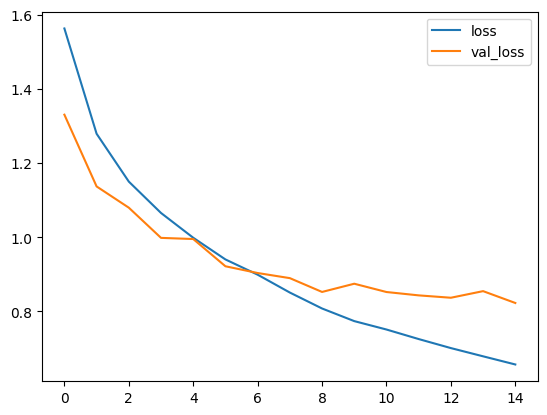

In [6]:
#plot the loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

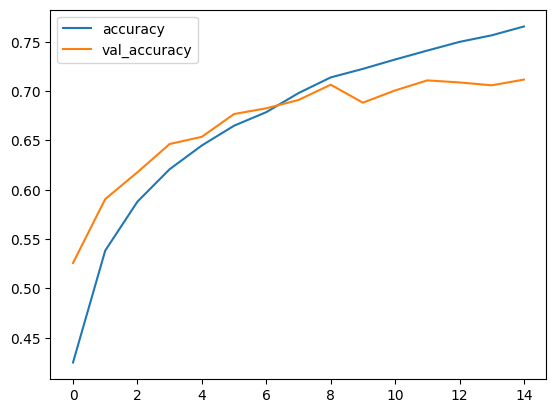

In [7]:
#plot the accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Confusion matrix, without normalization
[[701  19  52  19  11   3  17   7 125  46]
 [ 19 825   3   3   0   5  14   2  36  93]
 [ 66   8 587  62  88  55  90  12  16  16]
 [ 17   9  68 535  57 151 104  23  15  21]
 [ 26   2  72  81 664  27  71  37  13   7]
 [ 14   3  48 235  48 562  45  28   7  10]
 [  6   6  28  46  25  24 851   2   5   7]
 [ 20   4  32  55  75  54  19 715   2  24]
 [ 42  25  12   8   7   5   9   4 864  24]
 [ 29  77  10  13   5   6  12   8  27 813]]


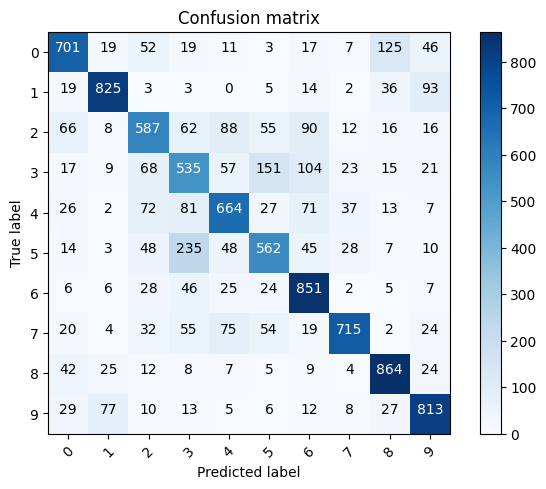

In [8]:
#Plot the confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

['airplane\nautomobile', '\nbird', '\ncat', '\ndeer', '\ndog\nfrog', '\nhorse', '\nship', '\ntruck']
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


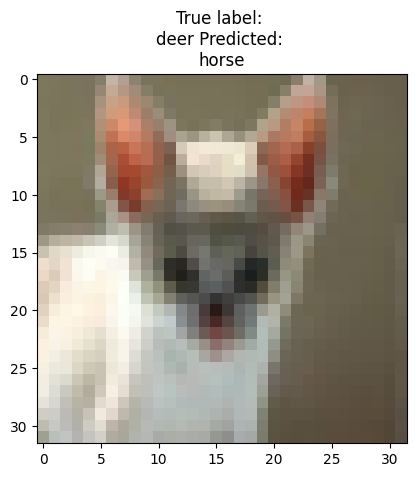

In [11]:
#show some misclassified examples
labels = '''airplane
automobile,
bird,
cat,
deer,
dog
frog,
horse,
ship,
truck'''.split(',')

print(labels)

p_test = np.argmax(model.predict(x_test), axis=1)
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));